In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
(training_data, training_label), (test_data,test_label) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_data= training_data/255.0
test_data = test_data/255.0

In [ ]:
model =tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28 , 1)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(150, activation='relu'),
tf.keras.layers.Dense(60, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5, mode='auto')
history = model.fit(training_data,training_label,epochs=30,validation_data=(test_data,test_label), callbacks=callback)

Epoch 1/30
1875/1875 [==============================] - 52s 27ms/step - loss: 0.6515 - accuracy: 0.7620 - val_loss: 0.5197 - val_accuracy: 0.8160
Epoch 2/30
1875/1875 [==============================] - 48s 26ms/step - loss: 0.4361 - accuracy: 0.8412 - val_loss: 0.4436 - val_accuracy: 0.8393
Epoch 3/30
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3713 - accuracy: 0.8630 - val_loss: 0.3692 - val_accuracy: 0.8640
Epoch 4/30
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3350 - accuracy: 0.8752 - val_loss: 0.3617 - val_accuracy: 0.8668
Epoch 5/30
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3097 - accuracy: 0.8842 - val_loss: 0.3416 - val_accuracy: 0.8763
Epoch 6/30
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2906 - accuracy: 0.8919 - val_loss: 0.3398 - val_accuracy: 0.8739
Epoch 7/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2732 - accuracy: 0.9002 - val_loss: 0.3244 -

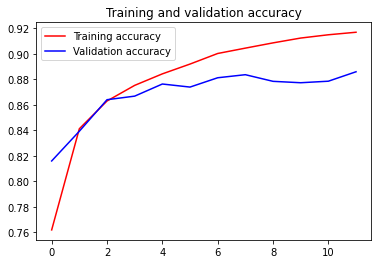

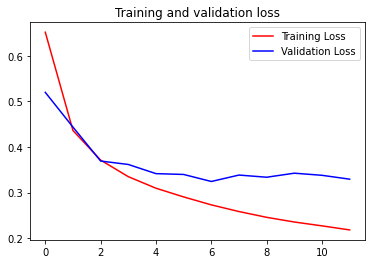

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
dir = '/model2'
tf.saved_model.save(model, dir)
 
converter = tf.lite.TFLiteConverter.from_saved_model(dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('/model2/modelklasifikasi.tflite')
tflite_model_file.write_bytes(tflite_model)

175228